In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from numpy import unique
from numpy import where

OPTICS algorithm:

OPTICS stands for Ordering Points to Identify the Clustering Structure. It's a density-based algorithm similar to DBSCAN, but it's better because it can find meaningful clusters in data that varies in density. It does this by ordering the data points so that the closest points are neighbors in the ordering.

This makes it easier to detect different density clusters. The OPTICS algorithm only processes each data point once, similar to DBSCAN (although it runs slower than DBSCAN). There's also a special distance stored for each data point that indicates a point belongs to a specific cluster

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
#Doing Lable Encoder before split the dataset
columns = ['Genre']
encoder=LabelEncoder()
for i in columns:
    dataset[i] = encoder.fit_transform(dataset[i])

In [7]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
X = dataset.iloc[:, [3, 4]].values

In [9]:
from sklearn.cluster import OPTICS

In [10]:
# Apply the BIRCH algorithm
optics_model = OPTICS()
optics_model.fit(X)

C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\jugip\anaconda3\envs\aiml\lib\sit

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=None, min_samples=5, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [11]:
# Assign each data point to a cluster
optics_pred = optics_model.fit_predict(X)

C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\jugip\anaconda3\envs\aiml\lib\sit

In [12]:
# Get unique clusters
optics_clusters = np.unique(optics_pred)

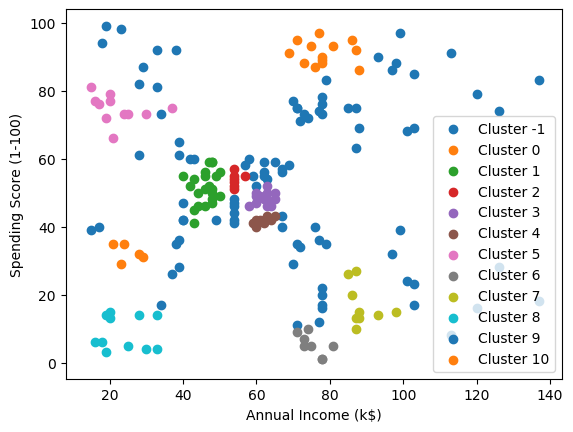

In [13]:
# Plot the BIRCH clusters
for optics_cluster in optics_clusters:
    # Get indices of data points in this cluster
    indices = where(optics_pred == optics_cluster)
    # Make the plot
    pyplot.scatter(X[indices, 0], X[indices, 1], label=f'Cluster {optics_cluster}')

# Add labels and legend
pyplot.xlabel('Annual Income (k$)')
pyplot.ylabel('Spending Score (1-100)')
pyplot.legend()
pyplot.show()

In [14]:
supervised=pd.DataFrame(dataset)

In [15]:
supervised['Cluster_group']=optics_pred

In [16]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,1,19,15,39,-1
1,2,1,21,15,81,5
2,3,0,20,16,6,8
3,4,0,23,16,77,5
4,5,0,31,17,40,-1
...,...,...,...,...,...,...
195,196,0,35,120,79,-1
196,197,0,45,126,28,-1
197,198,1,32,126,74,-1
198,199,1,32,137,18,-1


C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


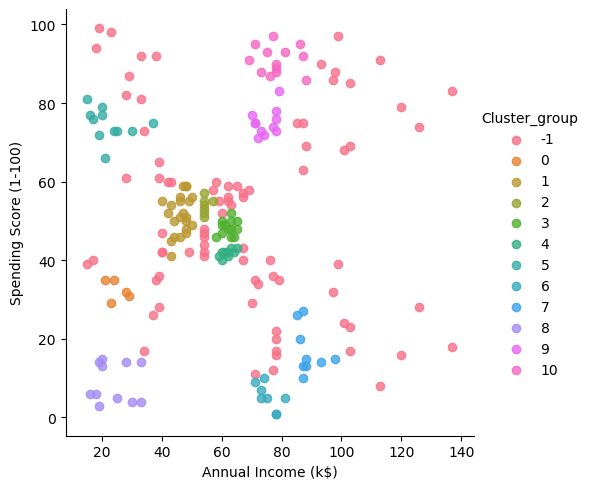

In [17]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)